Matteo Picciolini

# Esercitazione 5

In [1]:
#matplotlib
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D

#numpy
import numpy as np

#center graphs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?

### Risoluzione

#### Funzione d'onda

In fisica quantistica, una funzione d'onda $\psi$ è una descrizione matematica dello stato di un sistema quantistico. La funzione d'onda è un'ampiezza di probabilità a valori complessi e le probabilità dei possibili risultati delle misure effettuate sul sistema possono essere dedotte da essa.

Si consideri il caso semplice di una singola particella non relativistica, senza spin, in tre dimensioni spaziali. Lo stato di tale particella è completamente descritto dalla sua funzione d'onda $\psi(\vec{r},\,t)$, dove $\vec{r}$ rappresenta la posizione e $t$ il tempo.

Per una particella senza spin, se la funzione d'onda è interpretata come un'ampiezza di probabilità, il modulo al quadrato della funzione d'onda, $\left|\psi (\vec{r}, t)\right|^2$, è interpretato come la densità di probabilità che la particella si trovi in $\vec{r}$ al tempo $t$, che quindi è possibile sondare attraverso l'algoritmo di Metropolis.

Le funzioni d'onda degli autostati dell'atomo di idrogeno, che sono note in forma analitica, possono essere espresse in modo efficiente utilizzando le coordinate sferiche, mediante l'utilizzo delle armoniche sferiche $Y_l^m(\theta,\phi)$ e dei polinomi di Laguerre $L_{n-l-1}^{2l+1}(\cdot)$:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$
dove $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm è il raggio di Bohr, $L_{n-l-1}^{2l+1}$ sono i polinomi generalizzati di Laguerre di grado $n-l-1$, $n=1,2,...$ è il numero quantico principale, $l=0,1, ..., n-1$ è il numero quantico azimutale, $m=-l, -l+1, ..., l-1, l$ è il numero quantico magnetico.

Utilizzando questa formula generale si può ottenere che la forma del *ground state* dell'atomo di Idrogeno è:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0},
$$
mentre uno dei tre stati eccitati $2p$ è:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta).
$$
Si può calcolare che il valore di aspettazione di $r$ nei due casi è:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0,
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0.
$$


#### Metropolis

L'algoritmo di Metropolis è un metodo di campionamento di Monte Carlo che utilizza una procedura di *accept-reject* per generare sequenze di campioni da una distribuzione di probabilità desiderata quando la generazione diretta di tali campioni è difficile o impossibile. L'algoritmo richiede la conoscenza della funzione di densità di probabilità (PDF) della distribuzione *target*, ovvero la distribuzione da cui si desidera campionare. Utilizza anche una distribuzione di probabilità di transizione simmetrica per generare punti di prova, il che significa che la probabilità di passare dal punto corrente al punto di prova è uguale alla probabilità di passare dal punto di prova al punto corrente.

Per questa esercitazione, l'algoritmo funziona nel seguente modo:

- Partendo dalla posizione corrente $y$, viene proposto un passo casuale nello spazio tridimensionale di lunghezza massima $L$, portando alla posizione proposta $x$. Quindi, il nuovo punto $x$ viene generato a partire dalla posizione corrente $y$ sommando un vettore di spostamento casuale $\delta$ di lunghezza $|\delta| \leq L$. La proposta, come richeisto, viene effettuata secondo due distribuzioni di probabilità differenti: uniforme e gaussiana.
- Si calcola la probabilità di accettazione della mossa proposta $x$. La mossa proposta viene accettata con una probabilità determinata dalla regola di accettazione di Metropolis: 
$$A(x|y) = \min \left[1, \frac{p(x)}{p(y)}\right],$$ dove $p(\cdot)=|\psi(\cdot,t)|^2$
rappresenta la distribuzione di probabilità della posizione dell'elettrone. La regola di accettazione di Metropolis impone che la mossa proposta $x$ venga accettata con probabilità $1$ se la probabilità di trovare l'elettrone in $x$ è maggiore o uguale rispetto alla probabilità di trovare l'elettrone nella posizione corrente $y$, ovvero se $p(x) \geq p(y)$. In caso contrario, la mossa viene accettata con probabilità $p(x)/p(y)$.

È importante notare che la lunghezza massima $L$ del passo casuale è un parametro dell'algoritmo che deve essere scelto in modo appropriato. Se il passo casuale è troppo grande, l'algoritmo potrebbe avere una bassa efficienza e bassa probabilità di accettazione delle mosse proposte. D'altra parte, se il passo casuale è troppo piccolo, l'algoritmo potrebbe essere molto lento nel generare nuovi punti e sarebbe necessario un numero elevato di passi per esplorare l'intero spazio delle possibili posizioni.

Mostro di seguito il frammento di codice che implementa l'algoritmo di Metropolis per il ground state nella funzione `Move`:

```c++
ProposeStep();

for(int i = 0; i < 3; ++i){
    x[i] = y[i] + dr_g[i];
}

q = prob_ground(x) / prob_ground(y);
A = std::min(1., q);

if(rnd.Rannyu() < A){
    for(int i = 0; i < 3; ++i){
        r[i] = x[i];
    }
    accepted_gs++;
}
attempted_gs++;
```
dove la funzione `ProposeStep()` è così implementata:

```c++
void ProposeStep(){
    if(!gauss){
        for(int i = 0; i < 3; ++i){
            dr_g[i] = rnd.Rannyu(-L, L);
        }
    }
    else if(gauss){
        for(int i = 0; i < 3; ++i){
            dr_g[i] = rnd.Gauss(0, L);
        }
    }
}
```

#### Correlazione ed efficienza

Se le mosse proposte dall'algoritmo del Metropolis non si discostano di molto dal passo precedente, queste verranno facilmente accettate, ma potranno in questo caso essere facilmente correlate. Al contempo, però, step di lunghezza eccessiva saranno sicuramente scorrelati ma potranno portare a casi in cui in cui $\frac{p(y)}{p(x)}\ll 1$, compromettendo l'efficienza dell'algoritmo. Per questo, in questa simualzione si farà uso della regola empirica del $50\%$: essa afferma che l'algoritmo lavora in condizioni ottimali facendo passi tali che per il $50\%$ vengono accettati, per il $50\%$ rifiutati.

A livello di codice, questo controllo è gestito dalla funzione `PrintRate()`.

#### Commenti sul codice
Per funzionare, il codice necessita di un file di input `input-output/input.dat` in cui si specifica:
- `nblk`: numero dei blocchi,
- `nstep`: numero di step per blocco,
- `L`: lunghezza di uno step,
- `r[0]`: posizione iniziale del walker per la misura in *ground state*,
- `re[0]`: posizione iniziale del walker per la misura in *excited state*,
- `Gauss`: valore booleano per la scelta della distribuzione di probabilità per la transizione ($0$ Uniforme e $1$ Gaussiana).

Questo programma è stato costruito sulla falsa riga del codice fornito durante l'esercitazione 4. Il cuore del codice è la funzione `Move` che implementa l'algoritmo di Metropolis, e per farlo utilizza le funzioni `prob_ground()` e `prob_exited()`, che calcolano le funzioni d'onda rispettivamente per il ground state e per lo stato eccitato.

```c++
double prob_ground(double x[3]){
    double d = sqrt(x[0] * x[0] + x[1] * x[1] + x[2] * x[2]);
    double psi = pow(M_E, -d) / sqrt(M_PI);
    return psi * psi;
}

double prob_excited(double x[3]){
    double d = sqrt(x[0] * x[0] + x[1] * x[1] + x[2] * x[2]);
    double costheta = x[2]/d;
    double psi = 1. / 8. * sqrt(2. / M_PI) * d * pow(M_E, -d / 2) * costheta;
    return psi * psi;
}
```


A partire dalle variabili di accumulo prodotte dalla funzione `Accumulate`, invece, la funzione `BlockAverages` provvedere a implementare il moetodo del *data blocking*. Utilizzo, poi, funzioni specifiche per scrivere i risultati su file di testo esterni, in modo che poi possa usare i dati nel `Jupyter Notebook`.

Il programma implementa, inoltre, una funzione `Delete_old_files()` che elimina tutti i files generati dalle simulazioni precedenti, in modo da non mischiare i dati delle varie simulazioni. Durante l'esecuzione del programma viene richiesto se si vuole procedere con la cancellazione dei file vecchi.

#### Equilibrazione
Prima di fare la simulazione, è necessario equilibrare il sitema, per evitare di fare misure quando la particella è ancora in posizioni che alterano la sima della distanza media dal centro.

Per la fase di equilibrazione scelgo come punto di partenza dapprima il punto $\frac{\sqrt3}{2} a_0(1, 1, 1)$ per il *ground state* e il punto $\frac{5\sqrt3}{3} a_0(1, 1, 1)$ per lo stato eccitato. Per mostrare che scegliando un qualsiasi punto di partenza esiste un tempo di equilibrazione tale per cui il sistema converge alla soluzione, ho poi fatto equilibrare il sistema a partire da una configurazione in cui la particella era nella posizione di coordinate $100 a_0 (1, \, 1 ,\, 1)$.

Si mostrano di seguito i risultati dell'equilibrazione, realizzata con $100$ blocchi ciascuno da $10000$ steps.

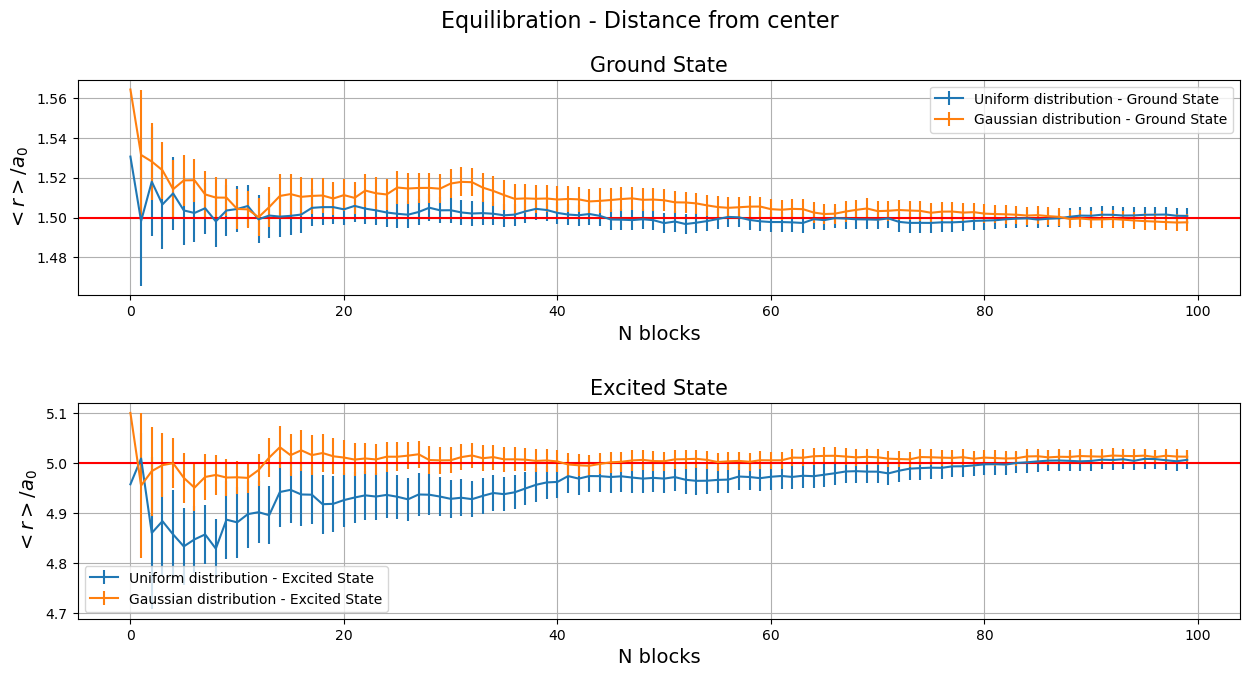

In [2]:
plt.figure(figsize =(15,7))

plt.subplot(2, 1, 1)
plt.suptitle("Equilibration - Distance from center", fontsize = 16)

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/05.1_Unif_0.87_0.87_0.87_Dist_Ground_State.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error, label = "Uniform distribution - Ground State")

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/05.1_Gauss_0.87_0.87_0.87_Dist_Ground_State.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error, label = "Gaussian distribution - Ground State")

plt.ylabel('$<r>/a_0$', fontsize = 14)
plt.xlabel('N blocks', fontsize = 14)
plt.grid(True)
plt.axhline(y=3/2, color = 'r', linestyle = '-')
plt.title('Ground State',  fontsize = 15)
plt.legend()

plt.subplot(2, 1, 2)
x_label, progressive_sum, progressive_error = np.loadtxt("../Data/05.1_Unif_0.87_0.87_0.87_Dist_Excited_State.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error, label = "Uniform distribution - Excited State")

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/05.1_Gauss_0.87_0.87_0.87_Dist_Excited_State.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error, label = "Gaussian distribution - Excited State")

plt.ylabel('$<r>/a_0$', fontsize = 14)
plt.xlabel('N blocks', fontsize = 14)
plt.grid(True)
plt.axhline(y=5, color = 'r', linestyle = '-')
plt.title('Excited State',  fontsize = 15)
plt.legend()

plt.subplots_adjust(hspace=0.5)

plt.show()


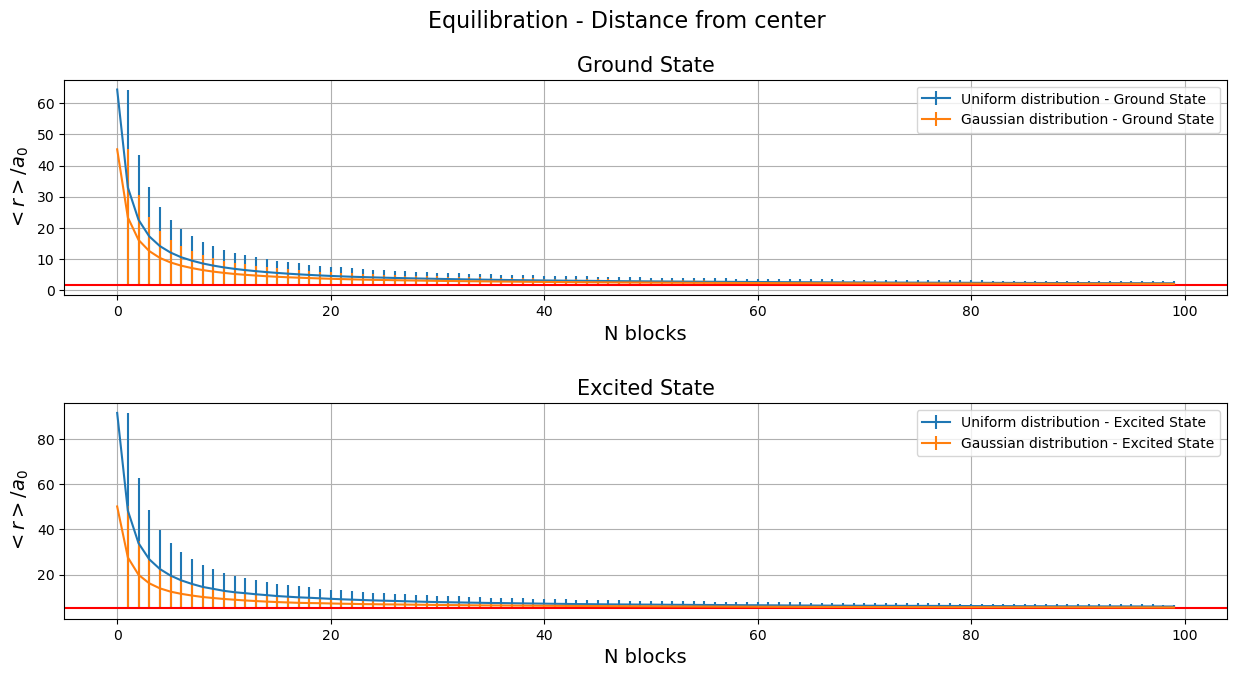

In [3]:
plt.figure(figsize =(15,7))

plt.subplot(2, 1, 1)
plt.suptitle("Equilibration - Distance from center", fontsize = 16)

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/05.1_Unif_100._100._100._Dist_Ground_State.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error, label = "Uniform distribution - Ground State")

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/05.1_Gauss_100._100._100._Dist_Ground_State.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error, label = "Gaussian distribution - Ground State")

plt.ylabel('$<r>/a_0$', fontsize = 14)
plt.xlabel('N blocks', fontsize = 14)
plt.grid(True)
plt.axhline(y=3/2, color = 'r', linestyle = '-')
plt.title('Ground State',  fontsize = 15)
plt.legend()

plt.subplot(2, 1, 2)
x_label, progressive_sum, progressive_error = np.loadtxt("../Data/05.1_Unif_100._100._100._Dist_Excited_State.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error, label = "Uniform distribution - Excited State")

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/05.1_Gauss_100._100._100._Dist_Excited_State.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error, label = "Gaussian distribution - Excited State")

plt.ylabel('$<r>/a_0$', fontsize = 14)
plt.xlabel('N blocks', fontsize = 14)
plt.grid(True)
plt.axhline(y=5, color = 'r', linestyle = '-')
plt.title('Excited State',  fontsize = 15)
plt.legend()

plt.subplots_adjust(hspace=0.5)

plt.show()

Come si può notare, in entrambi i casi, dopo $60$ blocchi si può essere ragionavolmente certi che il sistema abbia completato la fase di equilibrazione. Si mostra, di seguito, un grafico 3D che mostra l'avvicinamento della particella alla regione con alta probabilità.

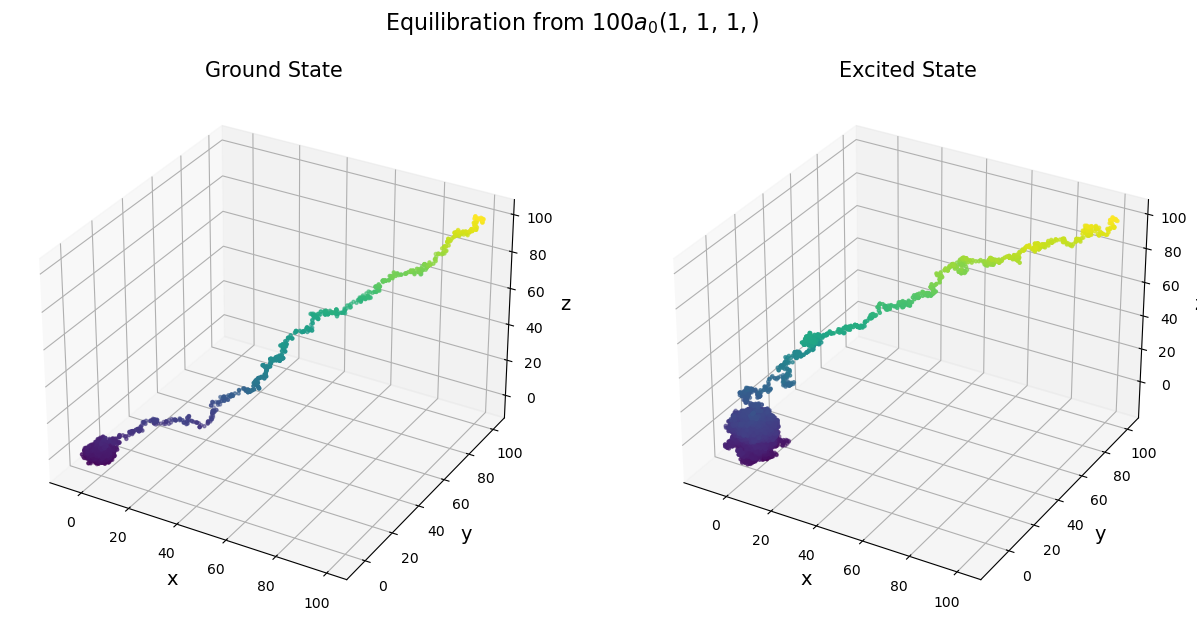

In [4]:
fig = plt.figure(figsize = (15,7))
plt.suptitle("Equilibration from $100a_0(1,\,1,\,1,)$", fontsize = 16)
state = ["GS", "ES"]
limsup = [20, 50]

ax = fig.add_subplot(1, 2, 1, projection = '3d')
X,Y,Z = np.loadtxt("../Data/05.1_Unif_100._100._100._Ground_State.dat", usecols = (0, 1, 2), unpack = True)
ax.set_title('Ground State',  fontsize = 15)
ax.scatter(X, Y, Z, c = Z, marker = '.')
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
ax.set_zlabel('z', fontsize = 14)

ax = fig.add_subplot(1, 2, 2, projection = '3d')
X,Y,Z = np.loadtxt("../Data/05.1_Unif_100._100._100._Excited_State.dat", usecols = (0, 1, 2), unpack = True)
ax.set_title('Excited State',  fontsize = 15)
ax.scatter(X, Y, Z, c = Z, marker = '.')
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
ax.set_zlabel('z', fontsize = 14)
plt.show()

#### Simulazione
Per essere certi che il sistema fosse completamente equilibrato, prima di fare le misure delle simulazioni si sono fatti eseguire $100000$ steps, introducendo nel `main` il seguente iteratore:
```c++
for(int i = 0; i < 1e5; ++i){
        Move();
    }
```
Si è scelta come step di lunghezza $L=1.2$ per le probabilità di transizione, in modo tale da ottenere circa il $50\%$ di *acceptance rate* per il *ground state* e l'*excited state*.

Le simulazioni che seguono sono state effettuate con $100$ blocchi da $10^4$ step ciascuno. Mostro di seguito i risultati.

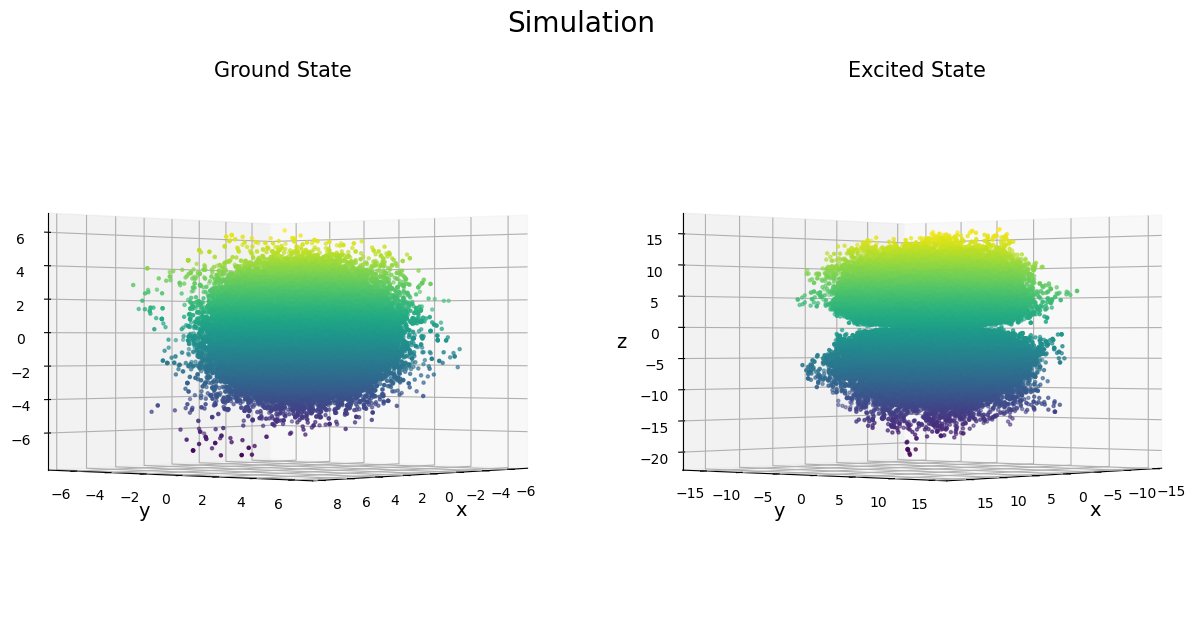

In [5]:
fig = plt.figure(figsize = (15,7))
plt.suptitle("Simulation", fontsize = 20)
state = ["GS", "ES"]
limsup = [20, 50]

ax = fig.add_subplot(1, 2, 1, projection = '3d')
X,Y,Z = np.loadtxt("../Data/05.1_Unif_1.00_1.00_1.00_Ground_State.dat", usecols = (0, 1, 2), unpack = True)
ax.set_title('Ground State',  fontsize = 15)
ax.scatter(X, Y, Z, c = Z, marker = '.')
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
ax.set_zlabel('z', fontsize = 14)
ax.view_init(0,40)

ax = fig.add_subplot(1, 2, 2, projection = '3d')
X,Y,Z = np.loadtxt("../Data/05.1_Unif_1.00_1.00_1.00_Excited_State.dat", usecols = (0, 1, 2), unpack = True)
ax.set_title('Excited State',  fontsize = 15)
ax.scatter(X, Y, Z, c = Z, marker = '.')
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
ax.set_zlabel('z', fontsize = 14)
ax.view_init(0,40)
plt.show()

Consistentemente con i risultati teorici, il *ground state* è simmetrico, mentre quello eccitato presenta la caratteristica forma a doppio lobo dell'orbitale *p*. Si mostrano ora i grafici relativi alla distanza dal centro.

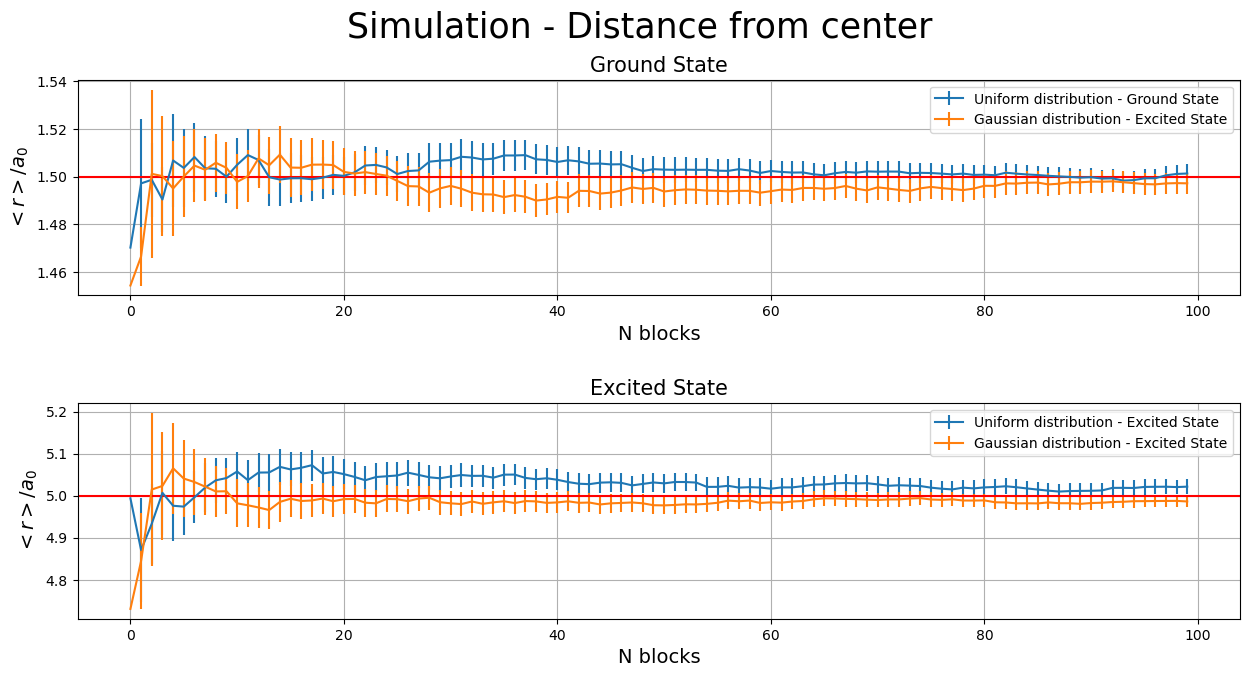

In [6]:
plt.figure(figsize = (15,7))

plt.subplot(2, 1, 1)
plt.suptitle("Simulation - Distance from center", fontsize = 25)

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/05.1_Unif_1.00_1.00_1.00_Dist_Ground_State.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error, label = "Uniform distribution - Ground State")

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/05.1_Gauss_1.00_1.00_1.00_Dist_Ground_State.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error, label = "Gaussian distribution - Excited State")

plt.ylabel('$<r>/a_0$', fontsize = 14)
plt.xlabel('N blocks', fontsize = 14)
plt.grid(True)
plt.axhline(y=3/2, color = 'r', linestyle = '-')
plt.title('Ground State',  fontsize = 15)
plt.legend()

plt.subplot(2, 1, 2)
x_label, progressive_sum, progressive_error = np.loadtxt("../Data/05.1_Unif_1.00_1.00_1.00_Dist_Excited_State.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error, label = "Uniform distribution - Excited State")

x_label, progressive_sum, progressive_error = np.loadtxt("../Data/05.1_Gauss_1.00_1.00_1.00_Dist_Excited_State.dat",
                                                          unpack = True, usecols = (0, 2, 3))
plt.errorbar(x_label, progressive_sum, yerr = progressive_error, label = "Gaussian distribution - Excited State")

plt.ylabel('$<r>/a_0$', fontsize = 14)
plt.xlabel('N blocks', fontsize = 14)
plt.grid(True)
plt.axhline(y = 5, color = 'r', linestyle = '-')
plt.title('Excited State',  fontsize = 15)
plt.legend()

plt.subplots_adjust(hspace = 0.5)

plt.show()

Alla stessa maniera, i dati ottenuti tramite simulazione sono compatibili con quanto prevede la teoria. Si può notare che, in generale, la scelta di una distribuzione Uniforme o Gaussiana per stabilire la probabilità di transizione non genera particolari miglioramenti.